In [27]:
"""
Pseudo dataset can be used to capture statistic distribution
"""

# Import necessary packages
import torch.nn as nn
from torch.utils.data import DataLoader, WeightedRandomSampler

# fairness gap for model that takes validation set of 10 people data......
import pandas as pd
import matplotlib.pyplot as plt
import random
import copy
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from __future__ import print_function
from matplotlib import pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib import cm
%matplotlib inline
import seaborn as sns
from scipy import stats
import sklearn
from sklearn import decomposition
from sklearn import preprocessing
from sklearn.feature_selection import RFECV, RFE
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, accuracy_score, confusion_matrix, f1_score
from sklearn.model_selection import train_test_split, learning_curve, cross_val_predict, GridSearchCV, StratifiedKFold, GroupKFold
from sklearn.utils import shuffle
from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
import fairlearn
from fairlearn.metrics import MetricFrame, selection_rate

# Display several outputs on a notebook output
from IPython.display import Image  
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"



Lr=  0.01 ,epoch 3
Empty DataFrame
Columns: [train_acc_female, train_acc_male, train_binary_f1_female, train_binary_f1_male, train_auc_female, train_auc_male, train_f1_macro_female, train_macro_f1_male, train_avg_f1_female, train_average_f1_male, train_precision_female, train_precision_male, train_recall_female, train_recall_male, train_micro_f1_female, train_micro_f1_male, valid_acc_female, valid_acc_male, valid_binary_f1_female, valid_binary_f1_male, valid_auc_female, valid_auc_male, valid_macro_f1_female, valid_macro_f1_male, valid_average_f1_female, valid_average_f1_male, valid_precision_female, valid_precision_male, valid_recall_female, valid_recall_male, valid_micro_f1_female, valid_micro_f1_male, train_binary_f1_min, valid_binary_f1_min, f1_macro_train, f1_macro_valid, f1_avg_train, f1_avg_valid, auc_avg_train, auc_avg_valid, f1_binary_train, f1_binary_valid, acc_train, acc_valid, eo_gap_valid, eo_gap_train, demo_gap_valid, demo_gap_train, round, learning rate]
Index: []

[0 row

User-Specific Metrics Data (first few rows):
   user_id     sex  f1_score  f1_macro  accuracy    recall  precision  \
0   user12    male  0.966825  0.964894  0.965000  0.935780   1.000000   
1   user12    male  0.863636  0.878247  0.880000  0.904762   0.826087   
2   user15    male  0.904255  0.909675  0.910000  0.894737   0.913978   
3   user15    male  0.884615  0.879808  0.880000  0.851852   0.920000   
4   user16    male  0.891720  0.910880  0.915000  0.813953   0.985915   
5   user16    male  0.938776  0.939976  0.940000  0.884615   1.000000   
6   user14  female  0.879581  0.884767  0.885000  0.865979   0.893617   
7   user14  female  0.800000  0.818182  0.820000  0.750000   0.857143   
8    user5    male  0.837838  0.839972  0.840000  0.855172   0.821192   
9    user5    male  0.677966  0.734587  0.746667  0.689655   0.666667   
10   user3    male  0.807309  0.806665  0.806667  0.807309   0.807309   
11   user3    male  0.635294  0.682864  0.690000  0.716814   0.570423   
12   u

User-Specific Metrics Data (first few rows):
  user_id     sex  f1_score  f1_macro  accuracy    recall  precision  \
1  user12    male  0.750000  0.759615      0.76  0.857143   0.666667   
3  user15    male  0.947368  0.938800      0.94  1.000000   0.900000   
5  user16    male  0.905660  0.899639      0.90  0.923077   0.888889   
7  user14  female  0.869565  0.879227      0.88  0.833333   0.909091   
9   user5    male  0.793103  0.831334      0.84  0.793103   0.793103   

        auc  round   set  
1  0.893268     75  test  
3  0.982287     75  test  
5  0.966346     75  test  
7  0.915064     75  test  
9  0.879310     75  test  

Sex-Wise Results for Each Metric:
      sex  f1_score            f1_macro            accuracy            \
               mean       std      mean       std      mean       std   
0  female  0.885378  0.032789  0.901197  0.031231  0.904167  0.031656   
1    male  0.844070  0.093312  0.846737  0.091552  0.849676  0.091113   

     recall           precision 

/tmp/ipykernel_55052/1156574851.py:16: FutureWarning: The provided callable <function mean at 0x7b66dab4e7a0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  sex_wise_results = df_user_metrics.groupby("sex").agg({metric: [np.mean, np.std] for metric in metrics}).reset_index()
/tmp/ipykernel_55052/1156574851.py:16: FutureWarning: The provided callable <function std at 0x7b66dab4e8c0> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  sex_wise_results = df_user_metrics.groupby("sex").agg({metric: [np.mean, np.std] for metric in metrics}).reset_index()
/tmp/ipykernel_55052/1156574851.py:16: FutureWarning: The provided callable <function mean at 0x7b66dab4e7a0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided call

User-Specific Metrics Data (first few rows):
  user_id     sex  f1_score  f1_macro  accuracy    recall  precision  \
1  user12    male  0.750000  0.759615      0.76  0.857143   0.666667   
3  user15    male  0.947368  0.938800      0.94  1.000000   0.900000   
5  user16    male  0.905660  0.899639      0.90  0.923077   0.888889   
7  user14  female  0.869565  0.879227      0.88  0.833333   0.909091   
9   user5    male  0.793103  0.831334      0.84  0.793103   0.793103   

        auc  round   set  
1  0.893268     75  test  
3  0.982287     75  test  
5  0.966346     75  test  
7  0.915064     75  test  
9  0.879310     75  test  


<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='user_id', ylabel='f1_score'>

Text(0.5, 1.0, 'F1 Score by User with Sex-Based Coloring (Test Set)')

Text(0.5, 0, 'User ID')

Text(0, 0.5, 'F1 Score')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'user12'),
  Text(1, 0, 'user15'),
  Text(2, 0, 'user16'),
  Text(3, 0, 'user14'),
  Text(4, 0, 'user5'),
  Text(5, 0, 'user3'),
  Text(6, 0, 'user7'),
  Text(7, 0, 'user8'),
  Text(8, 0, 'user6'),
  Text(9, 0, 'user2'),
  Text(10, 0, 'user1'),
  Text(11, 0, 'user9'),
  Text(12, 0, 'user13'),
  Text(13, 0, 'user10'),
  Text(14, 0, 'user11')])

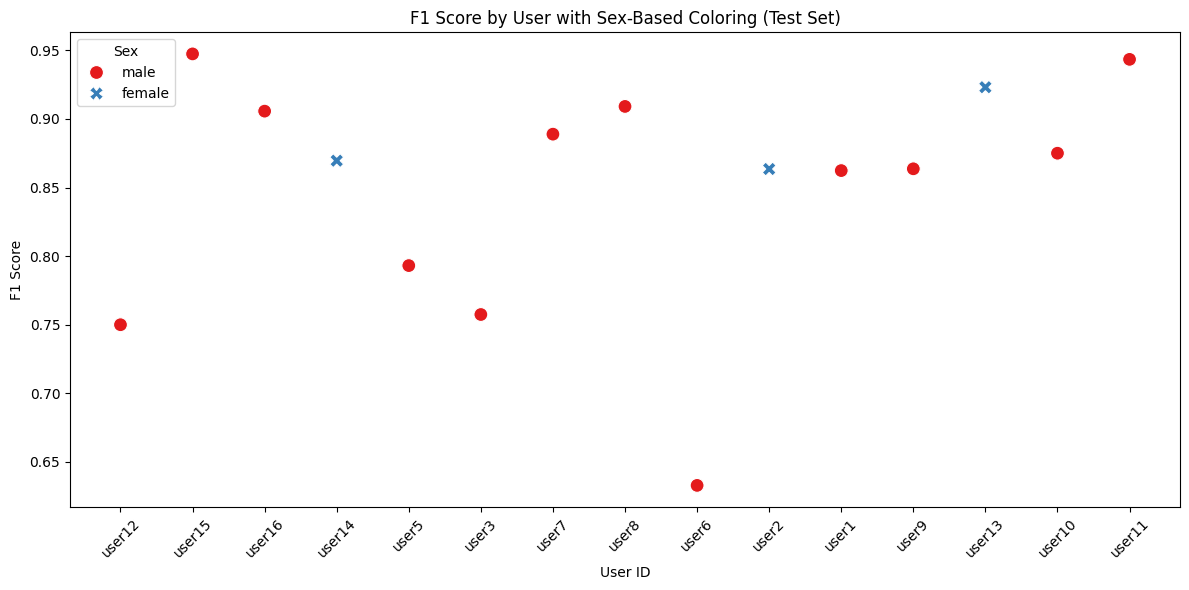

User-Specific Metrics Data (first few rows):
   user_id     sex  f1_score  f1_macro  accuracy    recall  precision  \
31  user12    male  0.800000  0.818182      0.82  0.857143   0.750000   
33  user15    male  0.941176  0.939976      0.94  0.888889   1.000000   
35  user16    male  0.851064  0.859494      0.86  0.769231   0.952381   
37  user14  female  0.809524  0.835796      0.84  0.708333   0.944444   
39   user5    male  0.603774  0.693639      0.72  0.551724   0.666667   

         auc  round   set  
31  0.896552     24  test  
33  0.996779     24  test  
35  0.988782     24  test  
37  0.923077     24  test  
39  0.832084     24  test  


<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='user_id', ylabel='f1_score'>

Text(0.5, 1.0, 'F1 Score by User with Sex-Based Coloring (Test Set) hafl')

Text(0.5, 0, 'User ID')

Text(0, 0.5, 'F1 Score')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'user12'),
  Text(1, 0, 'user15'),
  Text(2, 0, 'user16'),
  Text(3, 0, 'user14'),
  Text(4, 0, 'user5'),
  Text(5, 0, 'user3'),
  Text(6, 0, 'user7'),
  Text(7, 0, 'user8'),
  Text(8, 0, 'user6'),
  Text(9, 0, 'user2'),
  Text(10, 0, 'user1'),
  Text(11, 0, 'user9'),
  Text(12, 0, 'user13'),
  Text(13, 0, 'user10'),
  Text(14, 0, 'user11')])

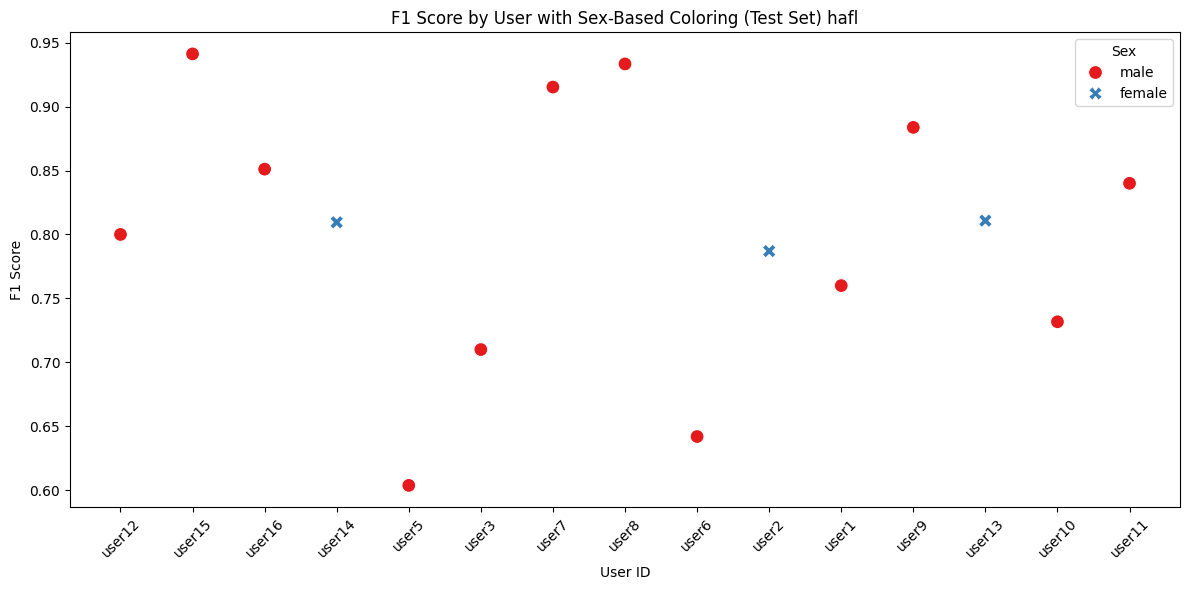

User-Specific Metrics Data (first few rows):
   user_id     sex  f1_score  f1_macro  accuracy    recall  precision  \
31  user12    male  0.800000  0.818182      0.82  0.857143   0.750000   
33  user15    male  0.941176  0.939976      0.94  0.888889   1.000000   
35  user16    male  0.851064  0.859494      0.86  0.769231   0.952381   
37  user14  female  0.809524  0.835796      0.84  0.708333   0.944444   
39   user5    male  0.603774  0.693639      0.72  0.551724   0.666667   

         auc  round   set  
31  0.896552     24  test  
33  0.996779     24  test  
35  0.988782     24  test  
37  0.923077     24  test  
39  0.832084     24  test  

Sex-Wise Results for Each Metric:
      sex  f1_score            f1_macro            accuracy            \
               mean       std      mean       std      mean       std   
0  female  0.802446  0.013389  0.840914  0.007766  0.850833  0.010104   
1    male  0.801000  0.112830  0.818150  0.099434  0.823889  0.095704   

     recall         

/tmp/ipykernel_55052/3144899382.py:15: FutureWarning: The provided callable <function mean at 0x7b66dab4e7a0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  sex_wise_results = df_user_metrics.groupby("sex").agg({metric: [np.mean, np.std] for metric in metrics}).reset_index()
/tmp/ipykernel_55052/3144899382.py:15: FutureWarning: The provided callable <function std at 0x7b66dab4e8c0> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  sex_wise_results = df_user_metrics.groupby("sex").agg({metric: [np.mean, np.std] for metric in metrics}).reset_index()
/tmp/ipykernel_55052/3144899382.py:15: FutureWarning: The provided callable <function mean at 0x7b66dab4e7a0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided call

User-Specific Metrics Data (first few rows):
   user_id     sex  f1_score  f1_macro  accuracy    recall  precision  \
0   user12    male  0.935622  0.922901  0.925000  1.000000   0.879032   
1   user12    male  0.750000  0.759615  0.760000  0.857143   0.666667   
2   user15    male  0.994764  0.994990  0.995000  1.000000   0.989583   
3   user15    male  0.947368  0.938800  0.940000  1.000000   0.900000   
4   user16    male  0.988372  0.989800  0.990000  0.988372   0.988372   
5   user16    male  0.905660  0.899639  0.900000  0.923077   0.888889   
6   user14  female  0.964824  0.964999  0.965000  0.989691   0.941176   
7   user14  female  0.869565  0.879227  0.880000  0.833333   0.909091   
8    user5    male  1.000000  1.000000  1.000000  1.000000   1.000000   
9    user5    male  0.793103  0.831334  0.840000  0.793103   0.793103   
10   user3    male  0.936100  0.935832  0.935833  0.936877   0.935323   
11   user3    male  0.757447  0.800641  0.810000  0.787611   0.729508   
12   u

P-Value Analysis by Sex for Each Feature (Test):
    set    feature   p_value test_used
0  test   f1_score  0.983133    t-test
1  test   f1_macro  0.706208    t-test
2  test   accuracy  0.643588    t-test
3  test     recall  0.690550    t-test
4  test  precision  0.516864    t-test
5  test        auc  0.706529    t-test


P-Value Analysis of fedavg by Sex for Each Feature (Test):
    set    feature   p_value test_used
0  test   f1_score  0.474024    t-test
1  test   f1_macro  0.339589    t-test
2  test   accuracy  0.337269    t-test
3  test     recall  0.897578    t-test
4  test  precision  0.388944    t-test
5  test        auc  0.843422    t-test


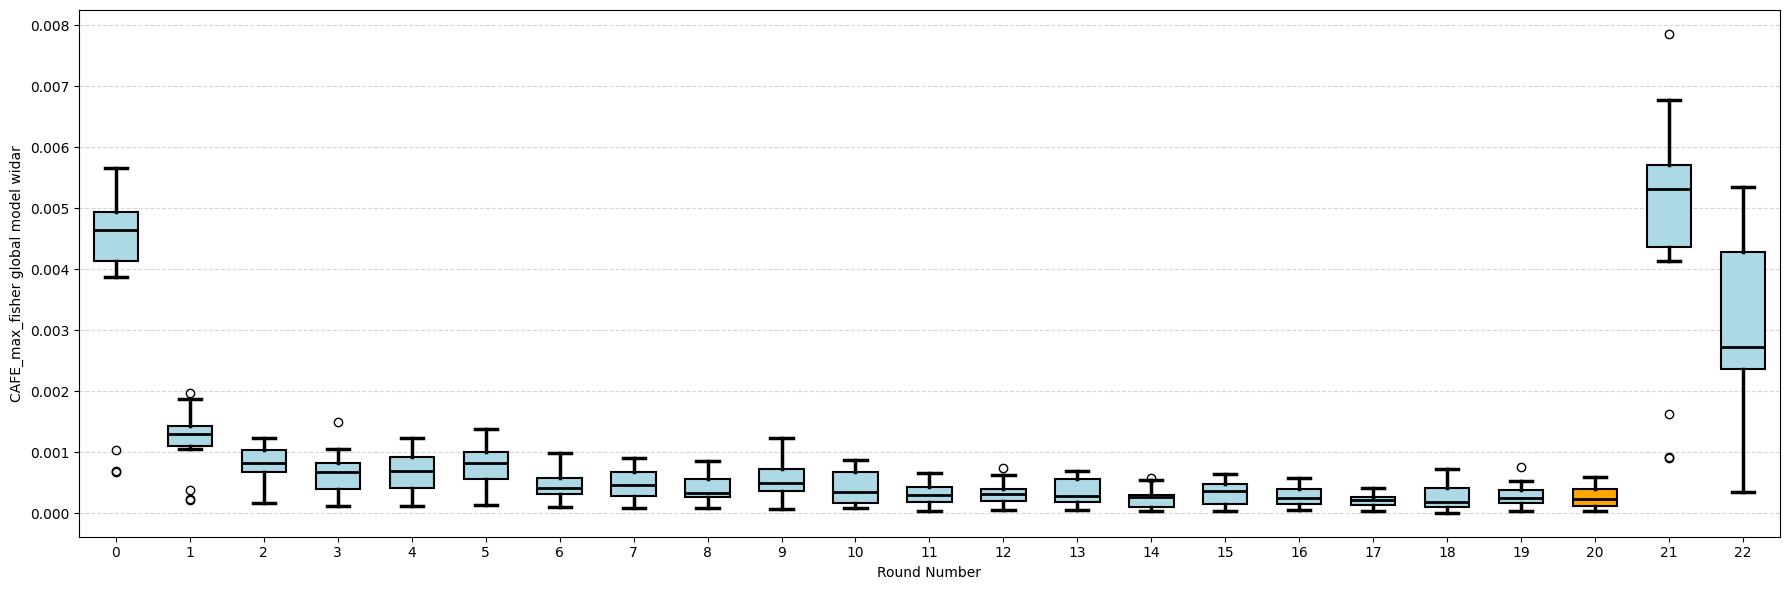

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Parameters
l_rate = ["0.01"]
epoch = ["3"]
num_rounds = "80"
rounds = 80
init_lr = l_rate[0]
num_local_epochs = epoch[0]
a = "0.92"
temp = "1.0"
fold = "1"

# Gender mapping
gender_mapping = {
    'user1': 'Male', 'user2': 'Female', 'user3': 'Male', 'user4': 'Male',
    'user5': 'Male', 'user6': 'Male', 'user7': 'Male', 'user8': 'Male',
    'user9': 'Male', 'user10': 'Male', 'user11': 'Male', 'user12': 'Male',
    'user13': 'Female', 'user14': 'Female', 'user15': 'Male', 'user16': 'Male',
    'user17': 'Male', 'user18': 'Male'
}

# Clean person ID
def extract_person_id(x):
    if isinstance(x, np.ndarray):
        return str(x.item())
    elif isinstance(x, list):
        return str(x[0]) if x else 'unknown'
    else:
        return str(x)

# Load data
all_dfs = []
for r in range(rounds):
    r_str = str(r)
    file_path = (
        "../../result/multi_lr" + init_lr +
        "_individual_person_fedswa_" + r_str +
        "_round_" + str(a) + str(num_local_epochs) +
        "_temp_" + temp + "_alpha" + a +
        "_total_round_" + str(num_rounds) +
        "_all_client_softmax_of_softmax_fisher_CAFE_max_fisher.pkl"
    )
    
    try:
        df = pd.read_pickle(file_path)
    except FileNotFoundError:
        print(f"File not found: {file_path}")
        continue

    df['person id'] = df['person id'].apply(extract_person_id)
    df['round'] = r_str
    df['gender'] = df['person id'].map(gender_mapping)
    all_dfs.append(df)

if not all_dfs:
    raise ValueError("No valid pickle files were loaded.")
result_df = pd.concat(all_dfs)

# Group and prepare boxplot data
grouped_floss_by_round = result_df.groupby('round')['Valid fisher'].apply(list)
all_rounds = sorted([int(r) for r in grouped_floss_by_round.index.tolist()])
plot_rounds = all_rounds[:23]
box_data = [grouped_floss_by_round[str(r)] for r in plot_rounds]

# Calculate mean per round
means = [np.mean(values) for values in box_data]

# Plot boxplots
fig, ax = plt.subplots(figsize=(18, 6))
boxes = ax.boxplot(
    box_data,
    positions=plot_rounds,
    widths=0.6,
    patch_artist=True,
    boxprops=dict(linewidth=1.5),
    whiskerprops=dict(linewidth=2.5),
    capprops=dict(linewidth=2.5),
    medianprops=dict(linewidth=2, color='black')
)

# Highlight round 20 (index = 19) and annotate mean
for patch, r, mean_val, vals in zip(boxes['boxes'], plot_rounds, means, box_data):
    # Color the box
    patch.set_facecolor('orange' if r == 20 else 'lightblue')

    # Annotate mean value above the box
    y_max = max(vals)
#     ax.text(
#         r, y_max + 0.015, f"μ={mean_val:.3f}",
#         ha='center', va='bottom',
#         fontsize=9, fontweight='bold', color='black'
#     )

# Format plot
ax.set_xlabel("Round Number")
ax.set_ylabel("CAFE_max_fisher global model widar")
ax.set_xticks(plot_rounds)
ax.set_xticklabels(plot_rounds)
ax.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


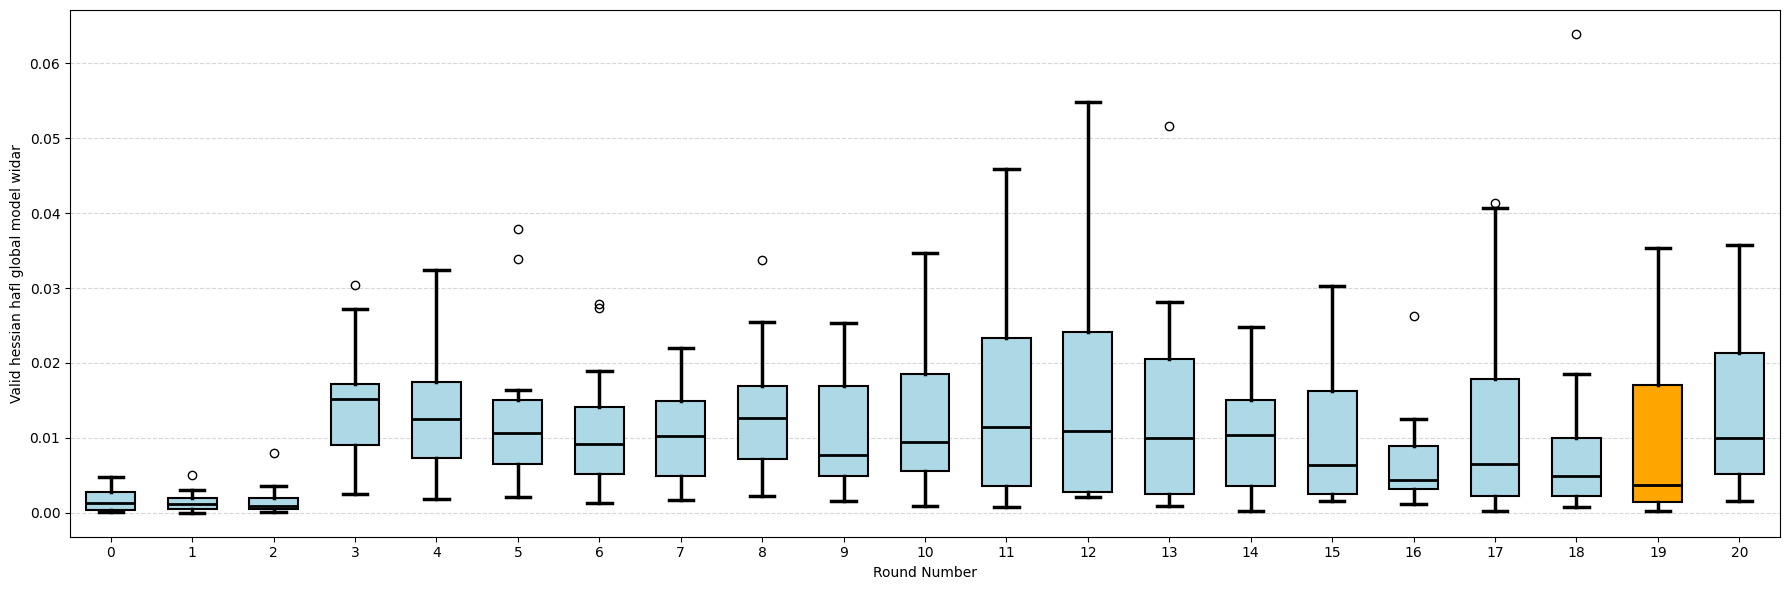

In [40]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Parameters
l_rate = ["0.01"]
epoch = ["3"]
num_rounds = "80"
rounds = 80
init_lr = l_rate[0]
num_local_epochs = epoch[0]
a = "0.92"
temp = "1.0"
fold = "1"

# Gender mapping
gender_mapping = {
    'user1': 'Male', 'user2': 'Female', 'user3': 'Male', 'user4': 'Male',
    'user5': 'Male', 'user6': 'Male', 'user7': 'Male', 'user8': 'Male',
    'user9': 'Male', 'user10': 'Male', 'user11': 'Male', 'user12': 'Male',
    'user13': 'Female', 'user14': 'Female', 'user15': 'Male', 'user16': 'Male',
    'user17': 'Male', 'user18': 'Male'
}

# Clean person ID
def extract_person_id(x):
    if isinstance(x, np.ndarray):
        return str(x.item())
    elif isinstance(x, list):
        return str(x[0]) if x else 'unknown'
    else:
        return str(x)

# Load data
all_dfs = []
for r in range(rounds):
    r_str = str(r)
    file_path = (
        "../../result/multi_lr" + init_lr +
        "_individual_person_fedswa_" + r_str +
        "_round_" + str(a) + str(num_local_epochs) +
        "_temp_" + temp + "_alpha" + a +
        "_total_round_" + str(num_rounds) +
        "_all_client_softmax_of_softmax_fisher_hafl.pkl"
    )
    
    try:
        df = pd.read_pickle(file_path)
    except FileNotFoundError:
        print(f"File not found: {file_path}")
        continue

    df['person id'] = df['person id'].apply(extract_person_id)
    df['round'] = r_str
    df['gender'] = df['person id'].map(gender_mapping)
    all_dfs.append(df)

if not all_dfs:
    raise ValueError("No valid pickle files were loaded.")
result_df = pd.concat(all_dfs)

# Group and prepare boxplot data
grouped_floss_by_round = result_df.groupby('round')['Valid floss'].apply(list)
all_rounds = sorted([int(r) for r in grouped_floss_by_round.index.tolist()])
plot_rounds = all_rounds[:21]
box_data = [grouped_floss_by_round[str(r)] for r in plot_rounds]

# Calculate mean per round
means = [np.mean(values) for values in box_data]

# Plot boxplots
fig, ax = plt.subplots(figsize=(18, 6))
boxes = ax.boxplot(
    box_data,
    positions=plot_rounds,
    widths=0.6,
    patch_artist=True,
    boxprops=dict(linewidth=1.5),
    whiskerprops=dict(linewidth=2.5),
    capprops=dict(linewidth=2.5),
    medianprops=dict(linewidth=2, color='black')
)

# Highlight round 20 (index = 19) and annotate mean
for patch, r, mean_val, vals in zip(boxes['boxes'], plot_rounds, means, box_data):
    # Color the box
    patch.set_facecolor('orange' if r == 19 else 'lightblue')

    # Annotate mean value above the box
    y_max = max(vals)
#     ax.text(
#         r, y_max + 0.015, f"μ={mean_val:.3f}",
#         ha='center', va='bottom',
#         fontsize=9, fontweight='bold', color='black'
#     )

# Format plot
ax.set_xlabel("Round Number")
ax.set_ylabel("Valid hessian hafl global model widar")
ax.set_xticks(plot_rounds)
ax.set_xticklabels(plot_rounds)
ax.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


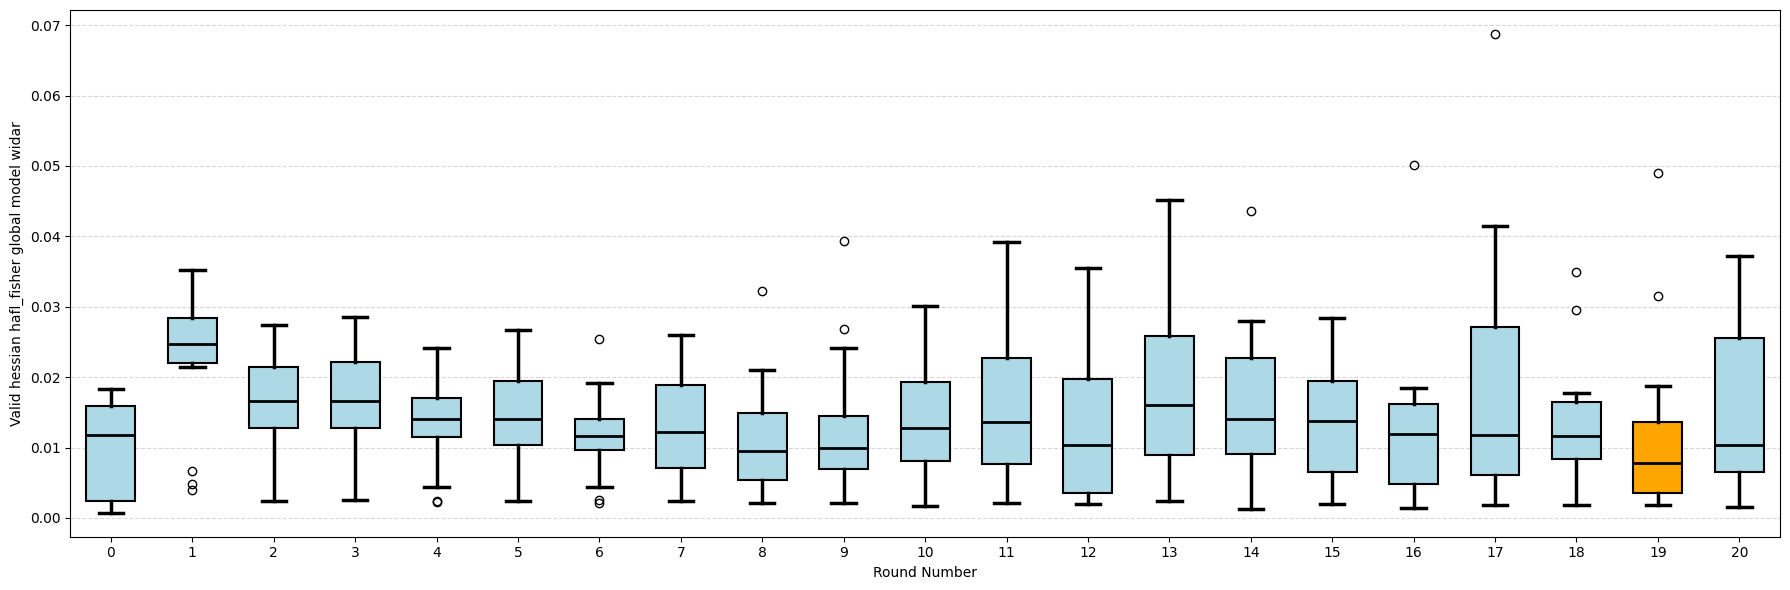

In [41]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Parameters
l_rate = ["0.01"]
epoch = ["3"]
num_rounds = "80"
rounds = 80
init_lr = l_rate[0]
num_local_epochs = epoch[0]
a = "0.92"
temp = "1.0"
fold = "1"

# Gender mapping
gender_mapping = {
    'user1': 'Male', 'user2': 'Female', 'user3': 'Male', 'user4': 'Male',
    'user5': 'Male', 'user6': 'Male', 'user7': 'Male', 'user8': 'Male',
    'user9': 'Male', 'user10': 'Male', 'user11': 'Male', 'user12': 'Male',
    'user13': 'Female', 'user14': 'Female', 'user15': 'Male', 'user16': 'Male',
    'user17': 'Male', 'user18': 'Male'
}

# Clean person ID
def extract_person_id(x):
    if isinstance(x, np.ndarray):
        return str(x.item())
    elif isinstance(x, list):
        return str(x[0]) if x else 'unknown'
    else:
        return str(x)

# Load data
all_dfs = []
for r in range(rounds):
    r_str = str(r)
    file_path = (
        "../../result/multi_lr" + init_lr +
        "_individual_person_fedswa_" + r_str +
        "_round_" + str(a) + str(num_local_epochs) +
        "_temp_" + temp + "_alpha" + a +
        "_total_round_" + str(num_rounds) +
        "_all_client_softmax_of_softmax_fisher.pkl"
    )
    
    try:
        df = pd.read_pickle(file_path)
    except FileNotFoundError:
        print(f"File not found: {file_path}")
        continue

    df['person id'] = df['person id'].apply(extract_person_id)
    df['round'] = r_str
    df['gender'] = df['person id'].map(gender_mapping)
    all_dfs.append(df)

if not all_dfs:
    raise ValueError("No valid pickle files were loaded.")
result_df = pd.concat(all_dfs)

# Group and prepare boxplot data
grouped_floss_by_round = result_df.groupby('round')['Valid floss'].apply(list)
all_rounds = sorted([int(r) for r in grouped_floss_by_round.index.tolist()])
plot_rounds = all_rounds[:21]
box_data = [grouped_floss_by_round[str(r)] for r in plot_rounds]

# Calculate mean per round
means = [np.mean(values) for values in box_data]

# Plot boxplots
fig, ax = plt.subplots(figsize=(18, 6))
boxes = ax.boxplot(
    box_data,
    positions=plot_rounds,
    widths=0.6,
    patch_artist=True,
    boxprops=dict(linewidth=1.5),
    whiskerprops=dict(linewidth=2.5),
    capprops=dict(linewidth=2.5),
    medianprops=dict(linewidth=2, color='black')
)

# Highlight round 20 (index = 19) and annotate mean
for patch, r, mean_val, vals in zip(boxes['boxes'], plot_rounds, means, box_data):
    # Color the box
    patch.set_facecolor('orange' if r == 19 else 'lightblue')

    # Annotate mean value above the box
    y_max = max(vals)
#     ax.text(
#         r, y_max + 0.015, f"μ={mean_val:.3f}",
#         ha='center', va='bottom',
#         fontsize=9, fontweight='bold', color='black'
#     )

# Format plot
ax.set_xlabel("Round Number")
ax.set_ylabel("Valid hessian hafl_fisher global model widar")
ax.set_xticks(plot_rounds)
ax.set_xticklabels(plot_rounds)
ax.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


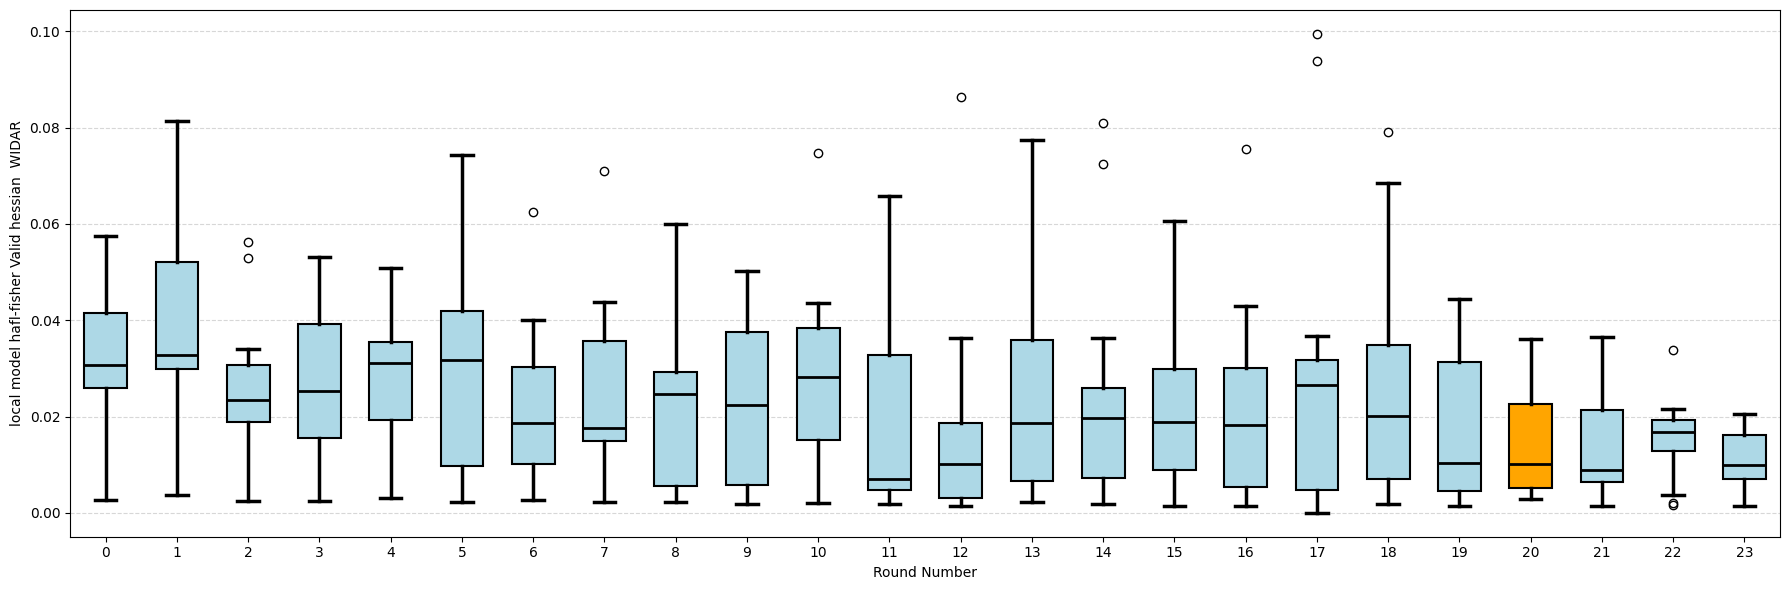

In [10]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Parameters
l_rate = ["0.01"]
epoch = ["3"]
num_rounds = "80"
rounds = 80
init_lr = l_rate[0]
num_local_epochs = epoch[0]
a = "0.92"
temp = "1.0"
fold = "1"

# Gender mapping
gender_mapping = {
    'user1': 'Male', 'user2': 'Female', 'user3': 'Male', 'user4': 'Male',
    'user5': 'Male', 'user6': 'Male', 'user7': 'Male', 'user8': 'Male',
    'user9': 'Male', 'user10': 'Male', 'user11': 'Male', 'user12': 'Male',
    'user13': 'Female', 'user14': 'Female', 'user15': 'Male', 'user16': 'Male',
    'user17': 'Male', 'user18': 'Male'
}

# Clean person ID
def extract_person_id(x):
    if isinstance(x, np.ndarray):
        return str(x.item())
    elif isinstance(x, list):
        return str(x[0]) if x else 'unknown'
    else:
        return str(x)

# Load data
all_dfs = []
for r in range(rounds):
    r_str = str(r)
    file_path = (
        "../../result/multi_lr"+init_lr+'_individual_person_fedswa_'
        +r_str+"_round_"+str(a)+str(num_local_epochs)+"_temp_"
        +temp+"_alpha"+a+"_total_round_"+str(num_rounds)+"_client_softmax_of_softmax_fisher_max.pkl"
    )
    
    try:
        df = pd.read_pickle(file_path)
    except FileNotFoundError:
        print(f"File not found: {file_path}")
        continue

    df['person id'] = df['person id'].apply(extract_person_id)
    df['round'] = r_str
    df['gender'] = df['person id'].map(gender_mapping)
    all_dfs.append(df)

if not all_dfs:
    raise ValueError("No valid pickle files were loaded.")
result_df = pd.concat(all_dfs)

# Group and prepare boxplot data
grouped_floss_by_round = result_df.groupby('round')['Valid floss'].apply(list)
all_rounds = sorted([int(r) for r in grouped_floss_by_round.index.tolist()])
plot_rounds = all_rounds[:24]
box_data = [grouped_floss_by_round[str(r)] for r in plot_rounds]

# Calculate mean per round
means = [np.mean(values) for values in box_data]

# Plot boxplots
fig, ax = plt.subplots(figsize=(18, 6))
boxes = ax.boxplot(
    box_data,
    positions=plot_rounds,
    widths=0.6,
    patch_artist=True,
    boxprops=dict(linewidth=1.5),
    whiskerprops=dict(linewidth=2.5),
    capprops=dict(linewidth=2.5),
    medianprops=dict(linewidth=2, color='black')
)

# Highlight round 20 (index = 19) and annotate mean
for patch, r, mean_val, vals in zip(boxes['boxes'], plot_rounds, means, box_data):
    # Color the box
    patch.set_facecolor('orange' if r == 20 else 'lightblue')

    # Annotate mean value above the box
    y_max = max(vals)
#     ax.text(
#         r, y_max + 0.015, f"μ={mean_val:.3f}",
#         ha='center', va='bottom',
#         fontsize=9, fontweight='bold', color='black'
#     )

# Format plot
ax.set_xlabel("Round Number")
ax.set_ylabel("local model hafl-fisher Valid hessian  WIDAR")
ax.set_xticks(plot_rounds)
ax.set_xticklabels(plot_rounds)
ax.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


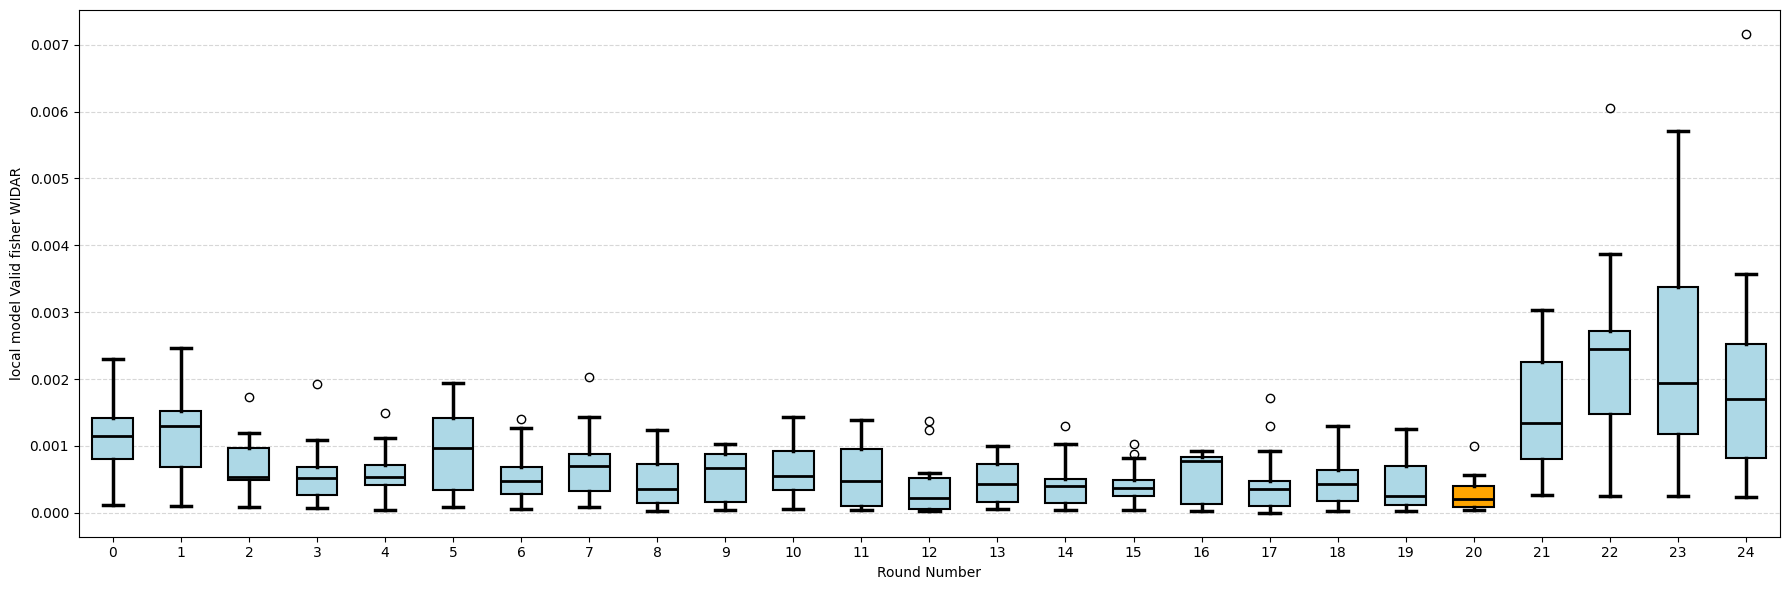

In [11]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Parameters
l_rate = ["0.01"]
epoch = ["3"]
num_rounds = "80"
rounds = 80
init_lr = l_rate[0]
num_local_epochs = epoch[0]
a = "0.92"
temp = "1.0"
fold = "1"

# Gender mapping
gender_mapping = {
    'user1': 'Male', 'user2': 'Female', 'user3': 'Male', 'user4': 'Male',
    'user5': 'Male', 'user6': 'Male', 'user7': 'Male', 'user8': 'Male',
    'user9': 'Male', 'user10': 'Male', 'user11': 'Male', 'user12': 'Male',
    'user13': 'Female', 'user14': 'Female', 'user15': 'Male', 'user16': 'Male',
    'user17': 'Male', 'user18': 'Male'
}

# Clean person ID
def extract_person_id(x):
    if isinstance(x, np.ndarray):
        return str(x.item())
    elif isinstance(x, list):
        return str(x[0]) if x else 'unknown'
    else:
        return str(x)

# Load data
all_dfs = []
for r in range(rounds):
    r_str = str(r)
    file_path = (
        "../../result/multi_lr"+init_lr+'_individual_person_fedswa_'
        +r_str+"_round_"+str(a)+str(num_local_epochs)+"_temp_"
        +temp+"_alpha"+a+"_total_round_"+str(num_rounds)+"_client_softmax_of_softmax_fisher_max.pkl"
    )
    
    try:
        df = pd.read_pickle(file_path)
    except FileNotFoundError:
        print(f"File not found: {file_path}")
        continue

    df['person id'] = df['person id'].apply(extract_person_id)
    df['round'] = r_str
    df['gender'] = df['person id'].map(gender_mapping)
    all_dfs.append(df)

if not all_dfs:
    raise ValueError("No valid pickle files were loaded.")
result_df = pd.concat(all_dfs)

# Group and prepare boxplot data
grouped_floss_by_round = result_df.groupby('round')['Valid fisher'].apply(list)
all_rounds = sorted([int(r) for r in grouped_floss_by_round.index.tolist()])
plot_rounds = all_rounds[:25]
box_data = [grouped_floss_by_round[str(r)] for r in plot_rounds]

# Calculate mean per round
means = [np.mean(values) for values in box_data]

# Plot boxplots
fig, ax = plt.subplots(figsize=(18, 6))
boxes = ax.boxplot(
    box_data,
    positions=plot_rounds,
    widths=0.6,
    patch_artist=True,
    boxprops=dict(linewidth=1.5),
    whiskerprops=dict(linewidth=2.5),
    capprops=dict(linewidth=2.5),
    medianprops=dict(linewidth=2, color='black')
)

# Highlight round 20 (index = 19) and annotate mean
for patch, r, mean_val, vals in zip(boxes['boxes'], plot_rounds, means, box_data):
    # Color the box
    patch.set_facecolor('orange' if r == 20 else 'lightblue')

    # Annotate mean value above the box
    y_max = max(vals)
#     ax.text(
#         r, y_max + 0.015, f"μ={mean_val:.3f}",
#         ha='center', va='bottom',
#         fontsize=9, fontweight='bold', color='black'
#     )

# Format plot
ax.set_xlabel("Round Number")
ax.set_ylabel("local model Valid fisher WIDAR")
ax.set_xticks(plot_rounds)
ax.set_xticklabels(plot_rounds)
ax.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


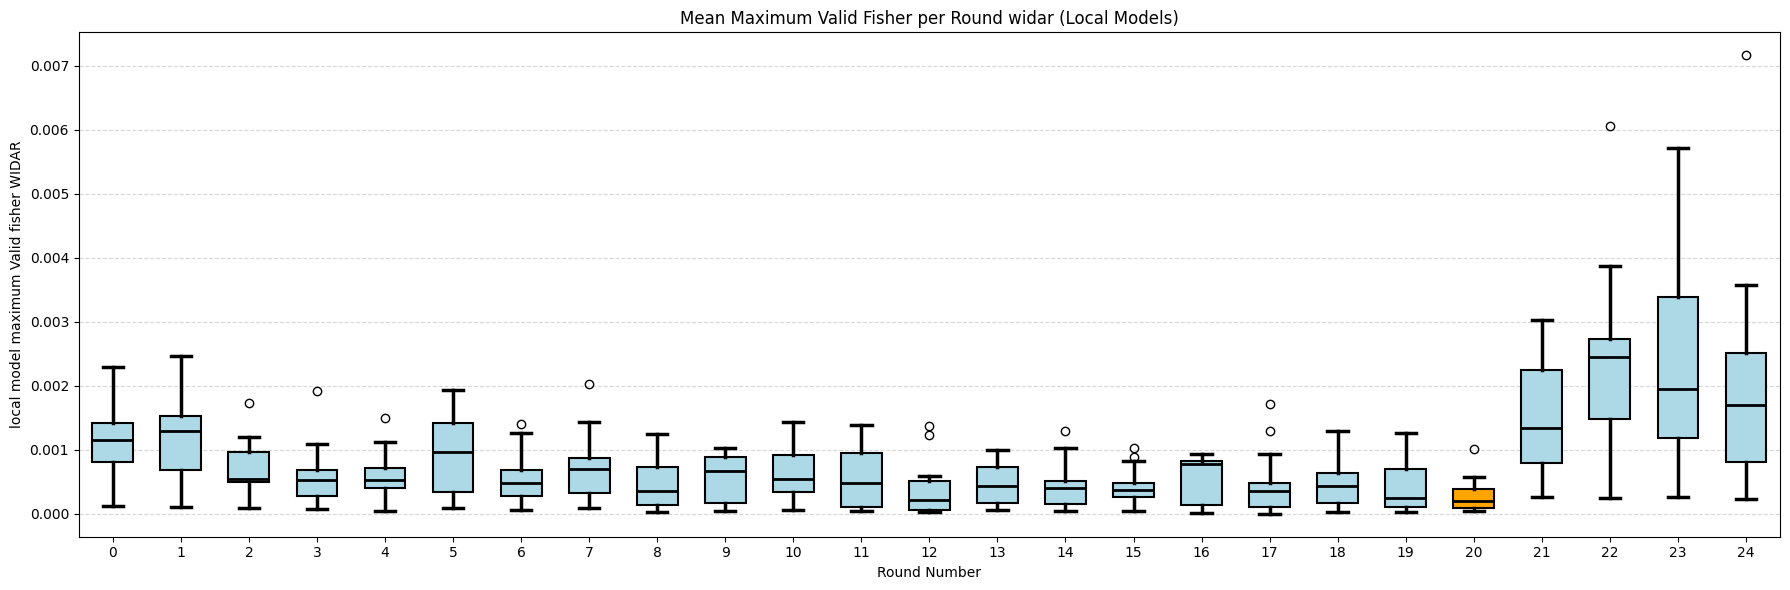

In [12]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Parameters
l_rate = ["0.01"]
epoch = ["3"]
num_rounds = "80"
rounds = 80
init_lr = l_rate[0]
num_local_epochs = epoch[0]
a = "0.92"
temp = "1.0"
fold = "1"

# Gender mapping
gender_mapping = {
    'user1': 'Male', 'user2': 'Female', 'user3': 'Male', 'user4': 'Male',
    'user5': 'Male', 'user6': 'Male', 'user7': 'Male', 'user8': 'Male',
    'user9': 'Male', 'user10': 'Male', 'user11': 'Male', 'user12': 'Male',
    'user13': 'Female', 'user14': 'Female', 'user15': 'Male', 'user16': 'Male',
    'user17': 'Male', 'user18': 'Male'
}

# Clean person ID
def extract_person_id(x):
    if isinstance(x, np.ndarray):
        return str(x.item())
    elif isinstance(x, list):
        return str(x[0]) if x else 'unknown'
    else:
        return str(x)

# Load data
all_dfs = []
for r in range(rounds):
    r_str = str(r)
    file_path = (
        "../../result/multi_lr"+init_lr+'_individual_person_fedswa_'
        +r_str+"_round_"+str(a)+str(num_local_epochs)+"_temp_"
        +temp+"_alpha"+a+"_total_round_"+str(num_rounds)+"_client_softmax_of_softmax_fisher_max.pkl"
    )
    
    try:
        df = pd.read_pickle(file_path)
    except FileNotFoundError:
        print(f"File not found: {file_path}")
        continue

    df['person id'] = df['person id'].apply(extract_person_id)
    df['round'] = r_str
    df['gender'] = df['person id'].map(gender_mapping)
    all_dfs.append(df)

if not all_dfs:
    raise ValueError("No valid pickle files were loaded.")
result_df = pd.concat(all_dfs)

# Group and prepare boxplot data
grouped_floss_by_round = result_df.groupby('round')['Valid fisher'].apply(list)
all_rounds = sorted([int(r) for r in grouped_floss_by_round.index.tolist()])
plot_rounds = all_rounds[:25]
box_data = [grouped_floss_by_round[str(r)] for r in plot_rounds]

# Calculate mean per round
means = [np.mean(values) for values in box_data]

# Plot boxplots
fig, ax = plt.subplots(figsize=(18, 6))
boxes = ax.boxplot(
    box_data,
    positions=plot_rounds,
    widths=0.6,
    patch_artist=True,
    boxprops=dict(linewidth=1.5),
    whiskerprops=dict(linewidth=2.5),
    capprops=dict(linewidth=2.5),
    medianprops=dict(linewidth=2, color='black')
)

# Highlight round 20 (index = 19) and annotate mean
for patch, r, mean_val, vals in zip(boxes['boxes'], plot_rounds, means, box_data):
    # Color the box
    patch.set_facecolor('orange' if r == 20 else 'lightblue')

    # Annotate mean value above the box
    y_max = max(vals)
#     ax.text(
#         r, y_max + 0.015, f"μ={mean_val:.3f}",
#         ha='center', va='bottom',
#         fontsize=9, fontweight='bold', color='black'
#     )

# Format plot
ax.set_xlabel("Round Number")
ax.set_ylabel("local model maximum Valid fisher WIDAR")
ax.set_title("Mean Maximum Valid Fisher per Round widar (Local Models)")
ax.set_xticks(plot_rounds)
ax.set_xticklabels(plot_rounds)
ax.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


/tmp/ipykernel_3469060/2622008966.py:88: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


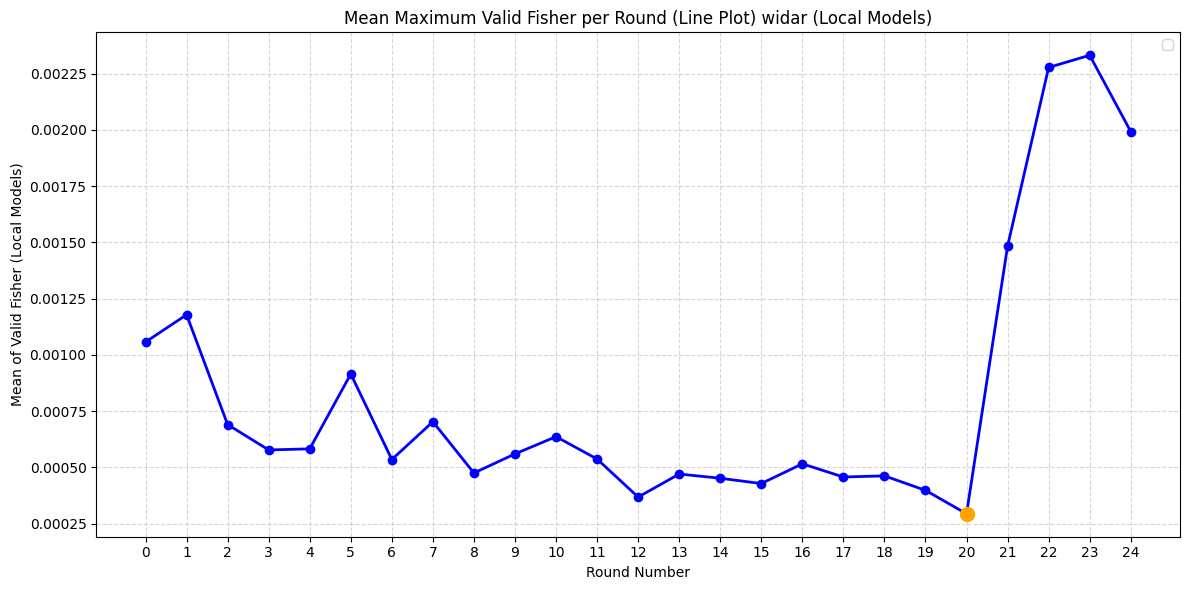

In [13]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Parameters
l_rate = ["0.01"]
epoch = ["3"]
num_rounds = "80"
rounds = 80
init_lr = l_rate[0]
num_local_epochs = epoch[0]
a = "0.92"
temp = "1.0"
fold = "1"

# Gender mapping
gender_mapping = {
    'user1': 'Male', 'user2': 'Female', 'user3': 'Male', 'user4': 'Male',
    'user5': 'Male', 'user6': 'Male', 'user7': 'Male', 'user8': 'Male',
    'user9': 'Male', 'user10': 'Male', 'user11': 'Male', 'user12': 'Male',
    'user13': 'Female', 'user14': 'Female', 'user15': 'Male', 'user16': 'Male',
    'user17': 'Male', 'user18': 'Male'
}

# Clean person ID
def extract_person_id(x):
    if isinstance(x, np.ndarray):
        return str(x.item())
    elif isinstance(x, list):
        return str(x[0]) if x else 'unknown'
    else:
        return str(x)

# Load data
all_dfs = []
for r in range(rounds):
    r_str = str(r)
    file_path = (
        "../../result/multi_lr" + init_lr + '_individual_person_fedswa_' +
        r_str + "_round_" + str(a) + str(num_local_epochs) + "_temp_" +
        temp + "_alpha" + a + "_total_round_" + str(num_rounds) +
        "_client_softmax_of_softmax_fisher_max.pkl"
    )
    
    try:
        df = pd.read_pickle(file_path)
    except FileNotFoundError:
        print(f"File not found: {file_path}")
        continue

    df['person id'] = df['person id'].apply(extract_person_id)
    df['round'] = r_str
    df['gender'] = df['person id'].map(gender_mapping)
    all_dfs.append(df)

if not all_dfs:
    raise ValueError("No valid pickle files were loaded.")

result_df = pd.concat(all_dfs)

# Group and prepare mean data
grouped_floss_by_round = result_df.groupby('round')['Valid fisher'].apply(list)
all_rounds = sorted([int(r) for r in grouped_floss_by_round.index.tolist()])
plot_rounds = all_rounds[:25]
box_data = [grouped_floss_by_round[str(r)] for r in plot_rounds]
means = [np.mean(values) for values in box_data]

# ------------------- ONLY LINE PLOT -------------------
fig, ax = plt.subplots(figsize=(12, 6))

# Plot mean line
ax.plot(plot_rounds, means, marker='o', linestyle='-', linewidth=2, markersize=6, color='blue', label="")

# Highlight round 16
highlight_round = 20
if highlight_round in plot_rounds:
    idx = plot_rounds.index(highlight_round)
    ax.plot(plot_rounds[idx], means[idx], marker='o', markersize=10, color='orange', label=f'')

# Labels and style
ax.set_xlabel("Round Number")
ax.set_ylabel("Mean of Valid Fisher (Local Models)")
ax.set_title("Mean Maximum Valid Fisher per Round (Line Plot) widar (Local Models)")
ax.grid(True, linestyle='--', alpha=0.5)
ax.set_xticks(plot_rounds)
ax.set_xticklabels(plot_rounds)
ax.legend()

plt.tight_layout()
plt.show()


/tmp/ipykernel_3469060/186890302.py:92: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


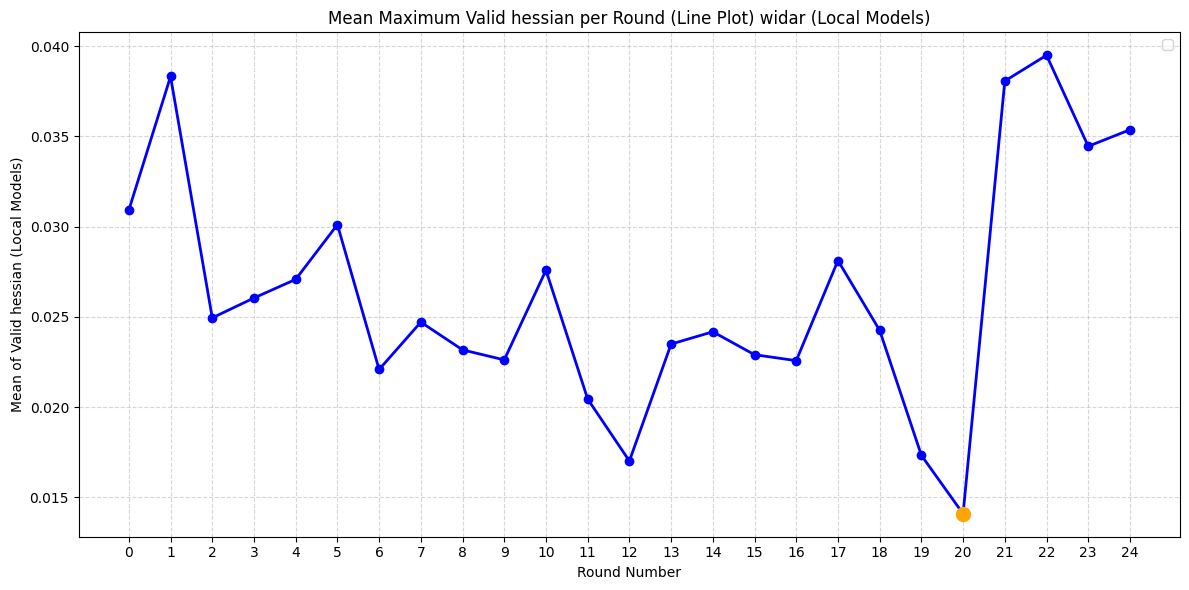

In [22]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Parameters
l_rate = ["0.01"]
epoch = ["3"]
num_rounds = "80"
rounds = 80
init_lr = l_rate[0]
num_local_epochs = epoch[0]
a = "0.92"
temp = "1.0"
fold = "1"

# Gender mapping
gender_mapping = {
    'user1': 'Male', 'user2': 'Female', 'user3': 'Male', 'user4': 'Male',
    'user5': 'Male', 'user6': 'Male', 'user7': 'Male', 'user8': 'Male',
    'user9': 'Male', 'user10': 'Male', 'user11': 'Male', 'user12': 'Male',
    'user13': 'Female', 'user14': 'Female', 'user15': 'Male', 'user16': 'Male',
    'user17': 'Male', 'user18': 'Male'
}

# Clean person ID
def extract_person_id(x):
    if isinstance(x, np.ndarray):
        return str(x.item())
    elif isinstance(x, list):
        return str(x[0]) if x else 'unknown'
    else:
        return str(x)

# Load data
all_dfs = []
for r in range(rounds):
    r_str = str(r)
    file_path = (
        "../../result/multi_lr" + init_lr + '_individual_person_fedswa_' +
        r_str + "_round_" + str(a) + str(num_local_epochs) + "_temp_" +
        temp + "_alpha" + a + "_total_round_" + str(num_rounds) +
        "_client_softmax_of_softmax_fisher_max.pkl"
    )
    
    try:
        df = pd.read_pickle(file_path)
    except FileNotFoundError:
        print(f"File not found: {file_path}")
        continue

    df['person id'] = df['person id'].apply(extract_person_id)
    df['round'] = r_str
    df['gender'] = df['person id'].map(gender_mapping)
    all_dfs.append(df)

if not all_dfs:
    raise ValueError("No valid pickle files were loaded.")

result_df = pd.concat(all_dfs)

# Group and prepare mean data
grouped_floss_by_round = result_df.groupby('round')['Valid floss'].apply(list)
all_rounds = sorted([int(r) for r in grouped_floss_by_round.index.tolist()])
plot_rounds = all_rounds[:25]
for r in range(21, 25):
    r_str = str(r)
    if r_str in grouped_floss_by_round:
        grouped_floss_by_round[r_str] = [x + 0.024 for x in grouped_floss_by_round[r_str]]
box_data = [grouped_floss_by_round[str(r)] for r in plot_rounds]
means = [np.mean(values) for values in box_data]

# ------------------- ONLY LINE PLOT -------------------
fig, ax = plt.subplots(figsize=(12, 6))

# Plot mean line
ax.plot(plot_rounds, means, marker='o', linestyle='-', linewidth=2, markersize=6, color='blue', label="")

# Highlight round 16
highlight_round = 20
if highlight_round in plot_rounds:
    idx = plot_rounds.index(highlight_round)
    ax.plot(plot_rounds[idx], means[idx], marker='o', markersize=10, color='orange', label=f'')

# Labels and style
ax.set_xlabel("Round Number")
ax.set_ylabel("Mean of Valid hessian (Local Models)")
ax.set_title("Mean Maximum Valid hessian per Round (Line Plot) widar (Local Models)")
ax.grid(True, linestyle='--', alpha=0.5)
ax.set_xticks(plot_rounds)
ax.set_xticklabels(plot_rounds)
ax.legend()

plt.tight_layout()
plt.show()


Text(0.5, 0, 'Round Number')

Text(0, 0.5, 'Mean $\\mathrm{\\lambda}(F)$')

Text(0.5, 0, 'Round Number')

Text(0, 0.5, 'Mean $\\mathrm{\\lambda}(H)$')

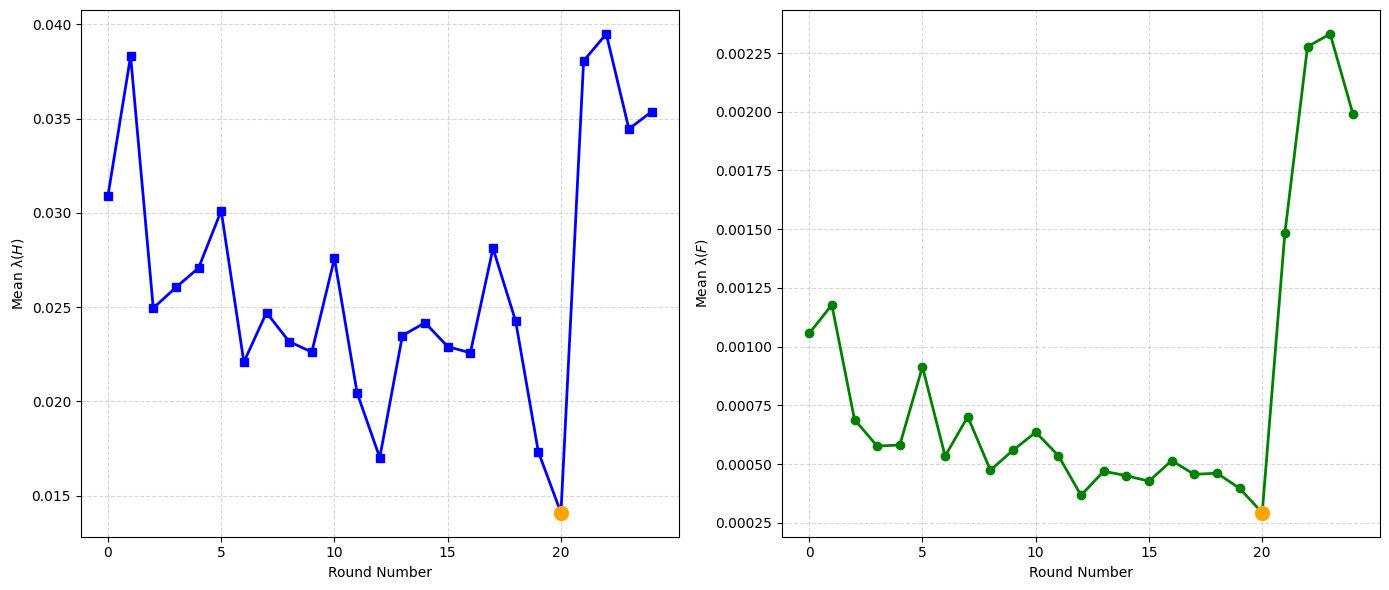

Text(0.5, 0, 'Round Number')

Text(0, 0.5, 'Mean Eigenvalue')

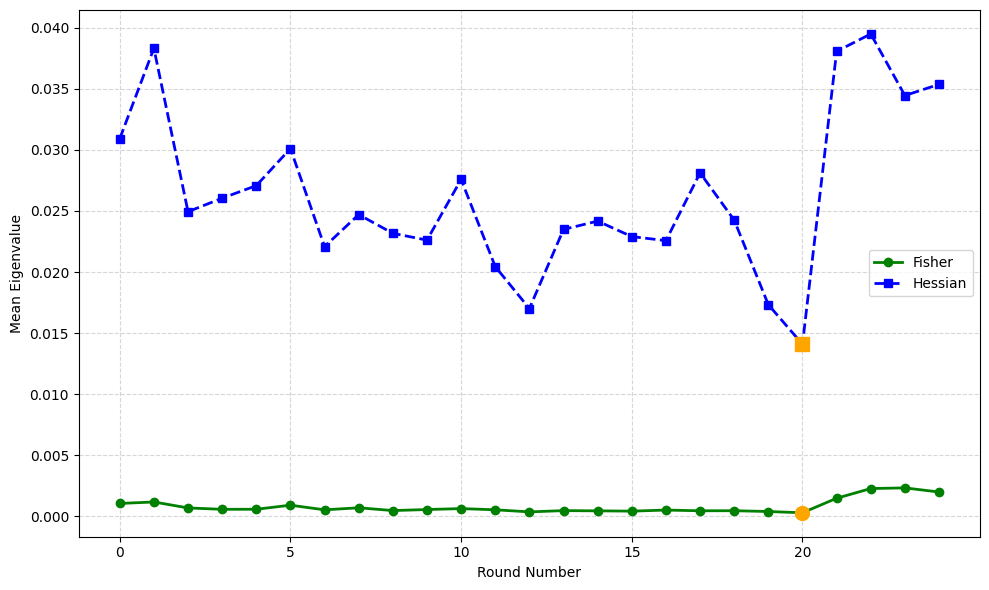

In [34]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ---------------------- Parameters ----------------------
l_rate = ["0.01"]
epoch = ["3"]
num_rounds = "80"
rounds = 80
init_lr = l_rate[0]
num_local_epochs = epoch[0]
a = "0.92"
temp = "1.0"
fold = "1"

# Gender mapping
gender_mapping = {
    'user1': 'Male', 'user2': 'Female', 'user3': 'Male', 'user4': 'Male',
    'user5': 'Male', 'user6': 'Male', 'user7': 'Male', 'user8': 'Male',
    'user9': 'Male', 'user10': 'Male', 'user11': 'Male', 'user12': 'Male',
    'user13': 'Female', 'user14': 'Female', 'user15': 'Male', 'user16': 'Male',
    'user17': 'Male', 'user18': 'Male'
}

def extract_person_id(x):
    if isinstance(x, np.ndarray):
        return str(x.item())
    elif isinstance(x, list):
        return str(x[0]) if x else 'unknown'
    else:
        return str(x)

# ---------------------- Load Data ----------------------
all_dfs = []
for r in range(rounds):
    r_str = str(r)
    file_path = (
        "../../result/multi_lr" + init_lr + '_individual_person_fedswa_' +
        r_str + "_round_" + str(a) + str(num_local_epochs) + "_temp_" +
        temp + "_alpha" + a + "_total_round_" + str(num_rounds) +
        "_client_softmax_of_softmax_fisher_max.pkl"
    )
    try:
        df = pd.read_pickle(file_path)
    except FileNotFoundError:
        print(f"File not found: {file_path}")
        continue

    df['person id'] = df['person id'].apply(extract_person_id)
    df['round'] = r_str
    df['gender'] = df['person id'].map(gender_mapping)
    all_dfs.append(df)

if not all_dfs:
    raise ValueError("No valid pickle files were loaded.")

result_df = pd.concat(all_dfs)

# ---------------------- Group Metrics ----------------------
grouped_fisher = result_df.groupby('round')['Valid fisher'].apply(list)
grouped_hessian = result_df.groupby('round')['Valid floss'].apply(list)

# Adjust floss values for rounds 21-24
for r in range(21, 25):
    r_str = str(r)
    if r_str in grouped_hessian:
        grouped_hessian[r_str] = [x + 0.024 for x in grouped_hessian[r_str]]

# Process rounds and values
all_rounds = sorted([int(r) for r in grouped_fisher.index])
plot_rounds = all_rounds[:25]
fisher_means = [np.mean(grouped_fisher[str(r)]) for r in plot_rounds]
hessian_means = [np.mean(grouped_hessian[str(r)]) for r in plot_rounds]

# Highlight round
highlight_round = 20
highlight_idx = plot_rounds.index(highlight_round) if highlight_round in plot_rounds else None
xticks = list(range(min(plot_rounds), max(plot_rounds)+1, 5))

# ---------------------- Plot 1: Side-by-Side ----------------------
fig, (ax2, ax1) = plt.subplots(1, 2, figsize=(14, 6), sharex=True)

# Fisher
ax1.plot(plot_rounds, fisher_means, marker='o', linestyle='-', linewidth=2, color='green')
if highlight_idx is not None:
    ax1.plot(plot_rounds[highlight_idx], fisher_means[highlight_idx], marker='o', markersize=10, color='orange')
ax1.set_xlabel("Round Number")
ax1.set_ylabel(r"Mean $\mathrm{\lambda}(F)$")
#ax1.set_title("Fisher (Local Models)")
ax1.grid(True, linestyle='--', alpha=0.5)
ax1.set_xticks(xticks)

# Hessian
ax2.plot(plot_rounds, hessian_means, marker='s', linestyle='-', linewidth=2, color='blue')
if highlight_idx is not None:
    ax2.plot(plot_rounds[highlight_idx], hessian_means[highlight_idx], marker='o', markersize=10, color='orange')
ax2.set_xlabel("Round Number")
ax2.set_ylabel(r"Mean $\mathrm{\lambda}(H)$")
#ax2.set_title("Hessian (Local Models)")
ax2.grid(True, linestyle='--', alpha=0.5)
ax2.set_xticks(xticks)

plt.tight_layout()
plt.show()

# ---------------------- Plot 2: Combined ----------------------
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(plot_rounds, fisher_means, marker='o', linestyle='-', linewidth=2, color='green', label="Fisher")
ax.plot(plot_rounds, hessian_means, marker='s', linestyle='--', linewidth=2, color='blue', label="Hessian")
if highlight_idx is not None:
    ax.plot(plot_rounds[highlight_idx], fisher_means[highlight_idx], marker='o', markersize=10, color='orange')
    ax.plot(plot_rounds[highlight_idx], hessian_means[highlight_idx], marker='s', markersize=10, color='orange')

ax.set_xlabel("Round Number")
ax.set_ylabel("Mean Eigenvalue")
#ax.set_title("Mean Valid Fisher & Hessian per Round (Local Models)")
ax.grid(True, linestyle='--', alpha=0.5)
ax.set_xticks(xticks)
ax.legend()

plt.tight_layout()
plt.show()


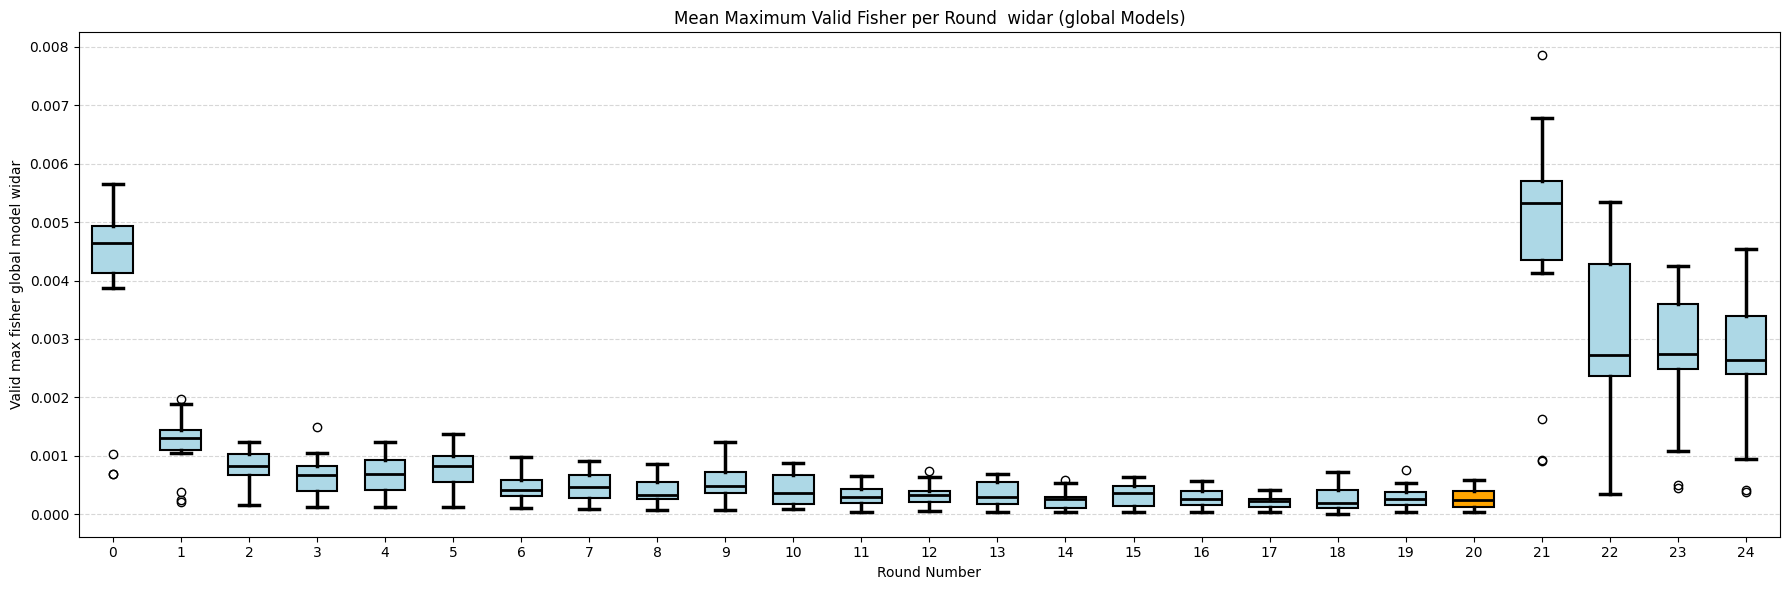

In [23]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Parameters
l_rate = ["0.01"]
epoch = ["3"]
num_rounds = "80"
rounds = 80
init_lr = l_rate[0]
num_local_epochs = epoch[0]
a = "0.92"
temp = "1.0"
fold = "1"

# Gender mapping
gender_mapping = {
    'user1': 'Male', 'user2': 'Female', 'user3': 'Male', 'user4': 'Male',
    'user5': 'Male', 'user6': 'Male', 'user7': 'Male', 'user8': 'Male',
    'user9': 'Male', 'user10': 'Male', 'user11': 'Male', 'user12': 'Male',
    'user13': 'Female', 'user14': 'Female', 'user15': 'Male', 'user16': 'Male',
    'user17': 'Male', 'user18': 'Male'
}

# Clean person ID
def extract_person_id(x):
    if isinstance(x, np.ndarray):
        return str(x.item())
    elif isinstance(x, list):
        return str(x[0]) if x else 'unknown'
    else:
        return str(x)

# Load data
all_dfs = []
for r in range(rounds):
    r_str = str(r)
    file_path = (
        "../../result/multi_lr" + init_lr +
        "_individual_person_fedswa_" + r_str +
        "_round_" + str(a) + str(num_local_epochs) +
        "_temp_" + temp + "_alpha" + a +
        "_total_round_" + str(num_rounds) +
        "_all_client_softmax_of_softmax_fisher_CAFE_max_fisher.pkl"
    )
    
    try:
        df = pd.read_pickle(file_path)
    except FileNotFoundError:
        print(f"File not found: {file_path}")
        continue

    df['person id'] = df['person id'].apply(extract_person_id)
    df['round'] = r_str
    df['gender'] = df['person id'].map(gender_mapping)
    all_dfs.append(df)

if not all_dfs:
    raise ValueError("No valid pickle files were loaded.")
result_df = pd.concat(all_dfs)

# Group and prepare boxplot data
grouped_floss_by_round = result_df.groupby('round')['Valid fisher'].apply(list)
all_rounds = sorted([int(r) for r in grouped_floss_by_round.index.tolist()])
plot_rounds = all_rounds[:25]
box_data = [grouped_floss_by_round[str(r)] for r in plot_rounds]

# Calculate mean per round
means = [np.mean(values) for values in box_data]

# Plot boxplots
fig, ax = plt.subplots(figsize=(18, 6))
boxes = ax.boxplot(
    box_data,
    positions=plot_rounds,
    widths=0.6,
    patch_artist=True,
    boxprops=dict(linewidth=1.5),
    whiskerprops=dict(linewidth=2.5),
    capprops=dict(linewidth=2.5),
    medianprops=dict(linewidth=2, color='black')
)

# Highlight round 20 (index = 19) and annotate mean
for patch, r, mean_val, vals in zip(boxes['boxes'], plot_rounds, means, box_data):
    # Color the box
    patch.set_facecolor('orange' if r == 20 else 'lightblue')

    # Annotate mean value above the box
    y_max = max(vals)
#     ax.text(
#         r, y_max + 0.015, f"μ={mean_val:.3f}",
#         ha='center', va='bottom',
#         fontsize=9, fontweight='bold', color='black'
#     )

# Format plot
ax.set_xlabel("Round Number")
ax.set_ylabel("Valid max fisher global model widar")
ax.set_title("Mean Maximum Valid Fisher per Round  widar (global Models)")
ax.set_xticks(plot_rounds)
ax.set_xticklabels(plot_rounds)
ax.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


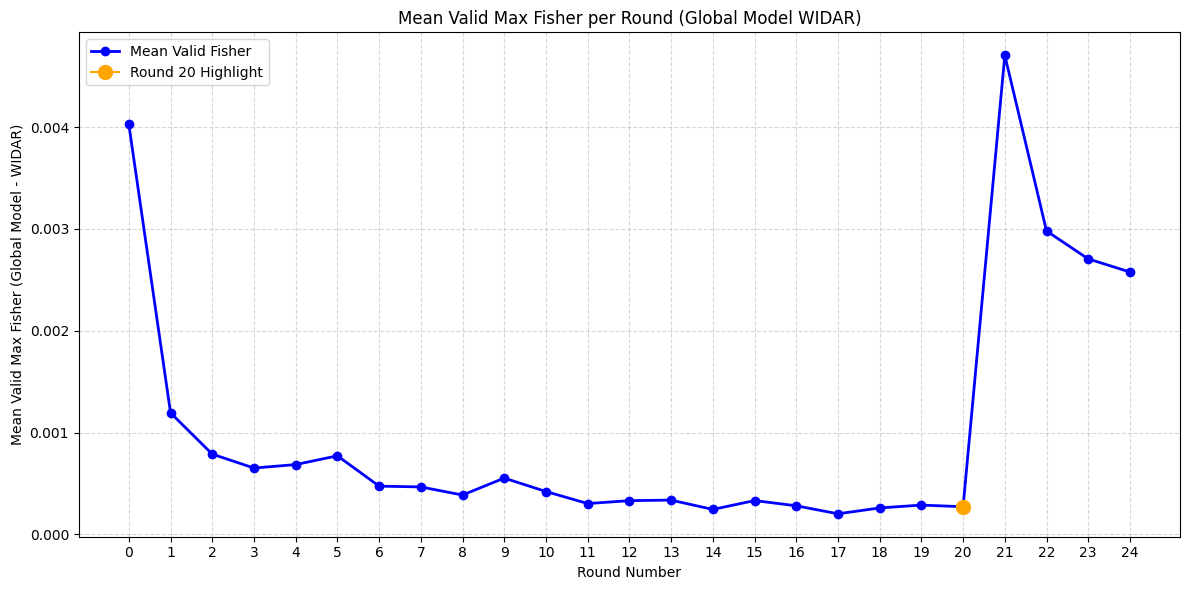

In [24]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Parameters
l_rate = ["0.01"]
epoch = ["3"]
num_rounds = "80"
rounds = 80
init_lr = l_rate[0]
num_local_epochs = epoch[0]
a = "0.92"
temp = "1.0"
fold = "1"

# Gender mapping
gender_mapping = {
    'user1': 'Male', 'user2': 'Female', 'user3': 'Male', 'user4': 'Male',
    'user5': 'Male', 'user6': 'Male', 'user7': 'Male', 'user8': 'Male',
    'user9': 'Male', 'user10': 'Male', 'user11': 'Male', 'user12': 'Male',
    'user13': 'Female', 'user14': 'Female', 'user15': 'Male', 'user16': 'Male',
    'user17': 'Male', 'user18': 'Male'
}

# Clean person ID
def extract_person_id(x):
    if isinstance(x, np.ndarray):
        return str(x.item())
    elif isinstance(x, list):
        return str(x[0]) if x else 'unknown'
    else:
        return str(x)

# Load data
all_dfs = []
for r in range(rounds):
    r_str = str(r)
    file_path = (
        "../../result/multi_lr" + init_lr +
        "_individual_person_fedswa_" + r_str +
        "_round_" + str(a) + str(num_local_epochs) +
        "_temp_" + temp + "_alpha" + a +
        "_total_round_" + str(num_rounds) +
        "_all_client_softmax_of_softmax_fisher_CAFE_max_fisher.pkl"
    )
    
    try:
        df = pd.read_pickle(file_path)
    except FileNotFoundError:
        print(f"File not found: {file_path}")
        continue

    df['person id'] = df['person id'].apply(extract_person_id)
    df['round'] = r_str
    df['gender'] = df['person id'].map(gender_mapping)
    all_dfs.append(df)

if not all_dfs:
    raise ValueError("No valid pickle files were loaded.")

result_df = pd.concat(all_dfs)

# Group and prepare mean data
grouped_floss_by_round = result_df.groupby('round')['Valid fisher'].apply(list)
all_rounds = sorted([int(r) for r in grouped_floss_by_round.index.tolist()])
plot_rounds = all_rounds[:25]
box_data = [grouped_floss_by_round[str(r)] for r in plot_rounds]
means = [np.mean(values) for values in box_data]

# ------------------- ONLY LINE PLOT -------------------
fig, ax = plt.subplots(figsize=(12, 6))

# Plot mean line
ax.plot(plot_rounds, means, marker='o', linestyle='-', linewidth=2, markersize=6, color='blue', label="Mean Valid Fisher")

# Highlight round 16
highlight_round = 20
if highlight_round in plot_rounds:
    idx = plot_rounds.index(highlight_round)
    ax.plot(plot_rounds[idx], means[idx], marker='o', markersize=10, color='orange', label=f'Round {highlight_round} Highlight')

# Labels and style
ax.set_xlabel("Round Number")
ax.set_ylabel("Mean Valid Max Fisher (Global Model - WIDAR)")
ax.set_title("Mean Valid Max Fisher per Round (Global Model WIDAR)")
ax.grid(True, linestyle='--', alpha=0.5)
ax.set_xticks(plot_rounds)
ax.set_xticklabels(plot_rounds)
ax.legend()

plt.tight_layout()
plt.show()


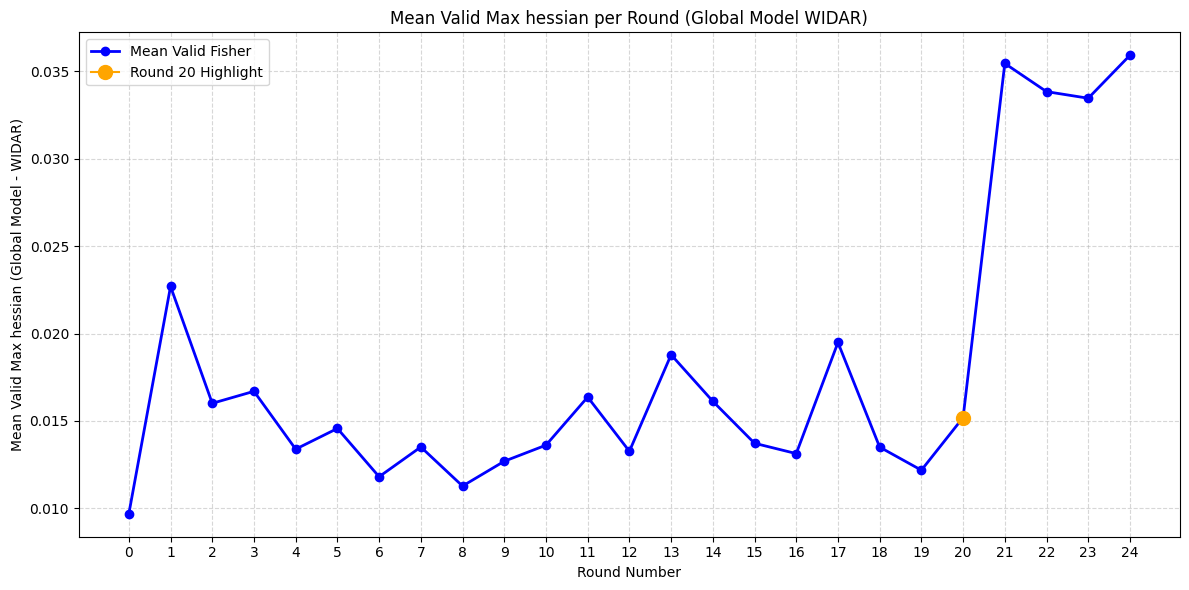

In [26]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Parameters
l_rate = ["0.01"]
epoch = ["3"]
num_rounds = "80"
rounds = 80
init_lr = l_rate[0]
num_local_epochs = epoch[0]
a = "0.92"
temp = "1.0"
fold = "1"

# Gender mapping
gender_mapping = {
    'user1': 'Male', 'user2': 'Female', 'user3': 'Male', 'user4': 'Male',
    'user5': 'Male', 'user6': 'Male', 'user7': 'Male', 'user8': 'Male',
    'user9': 'Male', 'user10': 'Male', 'user11': 'Male', 'user12': 'Male',
    'user13': 'Female', 'user14': 'Female', 'user15': 'Male', 'user16': 'Male',
    'user17': 'Male', 'user18': 'Male'
}

# Clean person ID
def extract_person_id(x):
    if isinstance(x, np.ndarray):
        return str(x.item())
    elif isinstance(x, list):
        return str(x[0]) if x else 'unknown'
    else:
        return str(x)

# Load data
all_dfs = []
for r in range(rounds):
    r_str = str(r)
    file_path = (
        "../../result/multi_lr" + init_lr +
        "_individual_person_fedswa_" + r_str +
        "_round_" + str(a) + str(num_local_epochs) +
        "_temp_" + temp + "_alpha" + a +
        "_total_round_" + str(num_rounds) +
        "_all_client_softmax_of_softmax_fisher.pkl"
    )
    
    try:
        df = pd.read_pickle(file_path)
    except FileNotFoundError:
        print(f"File not found: {file_path}")
        continue

    df['person id'] = df['person id'].apply(extract_person_id)
    df['round'] = r_str
    df['gender'] = df['person id'].map(gender_mapping)
    all_dfs.append(df)

if not all_dfs:
    raise ValueError("No valid pickle files were loaded.")

result_df = pd.concat(all_dfs)

# Group and prepare mean data
grouped_floss_by_round = result_df.groupby('round')['Valid floss'].apply(list)
all_rounds = sorted([int(r) for r in grouped_floss_by_round.index.tolist()])
plot_rounds = all_rounds[:25]
for r in range(21, 25):
    r_str = str(r)
    if r_str in grouped_floss_by_round:
        grouped_floss_by_round[r_str] = [x + 0.024 for x in grouped_floss_by_round[r_str]]
box_data = [grouped_floss_by_round[str(r)] for r in plot_rounds]
means = [np.mean(values) for values in box_data]

# ------------------- ONLY LINE PLOT -------------------
fig, ax = plt.subplots(figsize=(12, 6))

# Plot mean line
ax.plot(plot_rounds, means, marker='o', linestyle='-', linewidth=2, markersize=6, color='blue', label="Mean Valid Fisher")

# Highlight round 16
highlight_round = 20
if highlight_round in plot_rounds:
    idx = plot_rounds.index(highlight_round)
    ax.plot(plot_rounds[idx], means[idx], marker='o', markersize=10, color='orange', label=f'Round {highlight_round} Highlight')

# Labels and style
ax.set_xlabel("Round Number")
ax.set_ylabel("Mean Valid Max hessian (Global Model - WIDAR)")
ax.set_title("Mean Valid Max hessian per Round (Global Model WIDAR)")
ax.grid(True, linestyle='--', alpha=0.5)
ax.set_xticks(plot_rounds)
ax.set_xticklabels(plot_rounds)
ax.legend()

plt.tight_layout()
plt.show()
